# Modelos mecanicistas para a hidrólise enzimática

As equações a seguir representam subreações da etapa de hidrólise enzimática de matéria prima lignocelulósica.

## Variáveis

In [40]:
# Ef = 1
# Eb = 1
# S = 1
# S0 = 1 
# C = 1
# L = 1
# H = 1
# G = 1
# G2 = 1
# X = 1

## Parâmetros ajustados

In [41]:
Emax = 8.32
Kad = 7.16
alpha = 1
k1r = 0.177
k2r = 8.81
k3r = 201.0
k4r = 16.34
K1iG = 0.402
K1iG2 = 2.71
K1iX = 2.15
K2iG = 119.6
K2iG2 = 4.69
K2iX = 0.095
K3M = 26.6
K3iG = 11.06
K3iX = 1.023
K4iG = 16.25
K4iG2 = 4.0
K4iX = 154.0

## Equações

### Definições

In [42]:
#Langmuir-type isotherm 1

def Ebs1(Eb , S):

    Ebs1 = Eb/S

    return Ebs1

In [43]:
# Langmuir-type isotherm 2

def Ebs2(Emax, Kad, Ef):

    Ebs2 = Emax*Kad*Ef/(1+Kad*Ef)

    return Ebs2

In [44]:
# Enzyme adsorbed on cellulose

def Ebc(Eb, C, S):

    Ebc = Eb*C/S

    return Ebc

In [45]:
# Enzyme adsorbed on hemicellulose
def Ebh(Eb, H, S):

    Ebh = Eb*H/S

    return Ebh

In [46]:
# Substrate reactivity

def Rs(alpha, S, S0):

    Rs = alpha*S/S0

    return Rs

### Taxas de reação

In [47]:
# Reaction 1: Cellulose to cellobiose

def r1(k1r, Ebc, S, Rs, G2, G, X, K1iG, K1iG2, K1iX):

    r1 = k1r*Ebc*S*Rs/(1+ G2/K1iG2 + G/K1iG + X/K1iX)
    return r1

In [48]:
# Reaction 2: Cellulose to glucose
def r2(k2r, Ebc, S, Rs, G2, G, X, K2iG, K2iG2, K2iX):

    r2 = k2r*Ebc*S*Rs/(1+ G2/K2iG2 + G/K2iG + X/K2iX)
    return r2

In [49]:
# Reaction 3: Cellobiose to glucose
def r3(k3r, Ef, G2, G, X, K3M, K3iG, K3iX):

    r3 = k3r*Ef*G2/(((1 + G/K3iG + X/K3iX)*K3M)+G2)

    return r3

In [50]:
# Reaction 4: Hemicellulose to Xilose
def r4(k4r, Ebh, Rs, S, G2, G, X, K4iG, K4iG2, K4iX):

    r4 = k4r*Ebh*Rs*S/(1 + G2/K4iG2 + G/K4iG + X/K4iX)

    return r4

### Balanços de massa

In [51]:
# Total Enzyme
def Et(Eb, Ef):
    Et = Eb + Ef
    return Et

In [52]:
# Total Solids

def S(C, H, L):
    S = C + H + L
    return S

### Taxa de variação de componentes

In [53]:
# Cellulose balance

def dC_dt(r1, r2):

    dC_dt = -r1 - r2
    return dC_dt

In [54]:
# Cellobiose balance

def dG2_dt(r1, r3):
    dG2_dt = 1.056*r1 - r3
    return dG2_dt

In [55]:
# Glucose balance
def dG_dt(r2, r3):
    dG_dt = 1.111*r2 + 1.053*r3
    return dG_dt

In [56]:
# Hemicellulose balance

def dH_dt(r4):
    dH_dt = -r4
    return dH_dt

In [57]:
# Xylose balance
def dX_dt(r4):
    dX_dt = 1.136*r4
    return dX_dt

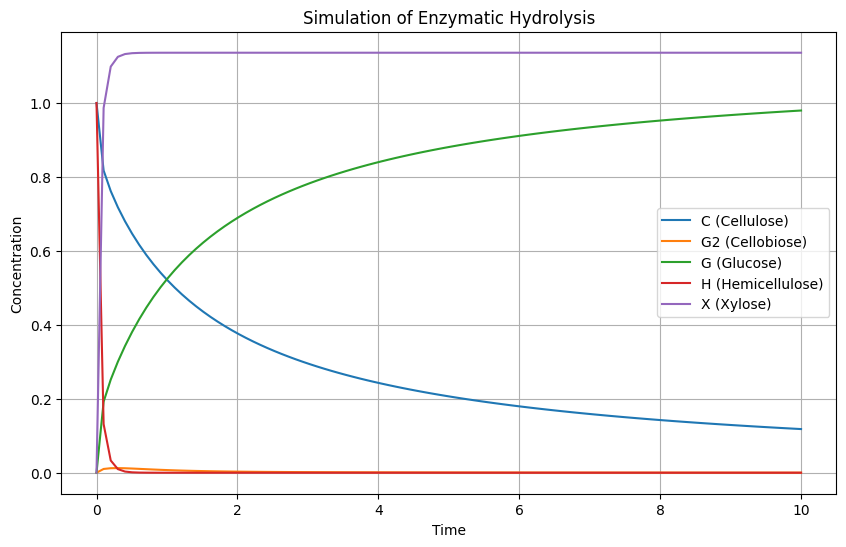

In [58]:
import numpy as np
from scipy.integrate import solve_ivp

# Função que define o sistema de equações diferenciais
def hydrolysis_ode(t, y, params):
    C, G2, G, H, X = y  # Variáveis do sistema
    Eb, Ef, S0, alpha, Emax, Kad, k1r, k2r, k3r, k4r, K1iG, K1iG2, K1iX, K2iG, K2iG2, K2iX, K3M, K3iG, K3iX, K4iG, K4iG2, K4iX = params
    
    # Calculando variáveis auxiliares
    S = C + H  # Total solids
    Rs = alpha * S / S0  # Substrate reactivity
    Ebc = Eb * C / S  # Enzyme adsorbed on cellulose
    Ebh = Eb * H / S  # Enzyme adsorbed on hemicellulose
    
    # Taxas de reação
    r1 = k1r * Ebc * S * Rs / (1 + G2 / K1iG2 + G / K1iG + X / K1iX)
    r2 = k2r * Ebc * S * Rs / (1 + G2 / K2iG2 + G / K2iG + X / K2iX)
    r3 = k3r * Ef * G2 / (((1 + G / K3iG + X / K3iX) * K3M) + G2)
    r4 = k4r * Ebh * Rs * S / (1 + G2 / K4iG2 + G / K4iG + X / K4iX)
    
    # Equações diferenciais
    dC_dt = -r1 - r2
    dG2_dt = 1.056 * r1 - r3
    dG_dt = 1.111 * r2 + 1.053 * r3
    dH_dt = -r4
    dX_dt = 1.136 * r4
    
    return [dC_dt, dG2_dt, dG_dt, dH_dt, dX_dt]

# Parâmetros do modelo
params = [
    1,  # Eb
    1,  # Ef
    1,  # S0
    1,  # alpha
    8.32,  # Emax
    7.16,  # Kad
    0.177,  # k1r
    8.81,  # k2r
    201.0,  # k3r
    16.34,  # k4r
    0.402,  # K1iG
    2.71,  # K1iG2
    2.15,  # K1iX
    119.6,  # K2iG
    4.69,  # K2iG2
    0.095,  # K2iX
    26.6,  # K3M
    11.06,  # K3iG
    1.023,  # K3iX
    16.25,  # K4iG
    4.0,  # K4iG2
    154.0  # K4iX
]

# Condições iniciais
y0 = [1, 0, 0, 1, 0]  # [C, G2, G, H, X]

# Intervalo de tempo para a simulação
t_span = (0, 10)  # De 0 a 10 unidades de tempo
t_eval = np.linspace(t_span[0], t_span[1], 100)  # Pontos de avaliação

# Resolvendo o sistema de equações diferenciais
solution = solve_ivp(hydrolysis_ode, t_span, y0, args=(params,), t_eval=t_eval)

# Plotando os resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(solution.t, solution.y[0], label="C (Cellulose)")
plt.plot(solution.t, solution.y[1], label="G2 (Cellobiose)")
plt.plot(solution.t, solution.y[2], label="G (Glucose)")
plt.plot(solution.t, solution.y[3], label="H (Hemicellulose)")
plt.plot(solution.t, solution.y[4], label="X (Xylose)")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.legend()
plt.title("Simulation of Enzymatic Hydrolysis")
plt.grid()
plt.show()

In [60]:
import pandas as pd

# Gerar o dataframe com os resultados da simulação
def generate_dataframe(solution):
    data = {
        "Time": solution.t,
        "Cellulose (C)": solution.y[0],
        "Cellobiose (G2)": solution.y[1],
        "Glucose (G)": solution.y[2],
        "Hemicellulose (H)": solution.y[3],
        "Xylose (X)": solution.y[4]
    }
    df = pd.DataFrame(data)
    return df

# Criar o dataframe
df_simulation = generate_dataframe(solution)

# Exibir os primeiros 5 pontos
df_simulation

,Time,Cellulose (C),Cellobiose (G2),Glucose (G),Hemicellulose (H),Xylose (X)
0,0.00000,1.000000,0.000000,0.000000,1.000000e+00,0.000000
1,0.10101,0.817461,0.010183,0.192091,1.314241e-01,0.986702
2,0.20202,0.761772,0.012190,0.251853,3.307577e-02,1.098426
3,0.30303,0.718039,0.012497,0.300122,9.792608e-03,1.124876
4,0.40404,0.680266,0.012080,0.342531,3.172801e-03,1.132396
...,...,...,...,...,...,...
95,9.59596,0.122304,0.000220,0.974956,2.787381e-14,1.136000
96,9.69697,0.121220,0.000215,0.976166,2.312024e-14,1.136000
97,9.79798,0.120154,0.000211,0.977354,1.918334e-14,1.136000
98,9.89899,0.119108,0.000206,0.978522,1.594614e-14,1.136000
